<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

# What is model used for?
**In this stage, I will train a time series machine learning model that forecast the GDP in asia (and specific country in asia).**

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
# sklearn libraries
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression

# setup
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

## Data preparation

In [2]:
# YOUR CODE HERE (OPTION) 
# read processed dataset
filepath = '../data/processed/21120576_asia_processed.csv'
asia_df = pd.read_csv(filepath)
asia_df

,Total Population,Female Population,Male Population,Birth Rate,Death Rate,Compulsory Education Dur.,Employment in Industry(%),Employment in Agriculture(%),Female Employment in Agriculture(%),Female Employment in Industry(%),...,Electric Power Consumption(kWH per capita),Renewable Energy Consumption (%),Fossil Fuel Consumption (%),Male life expectancy,Female life expectancy,"School enrollment, primary","School enrollment, tertiary",Primary completion rate,Year,Country
0,41128771.0,20362329.0,20766442.0,20.700378,6.343087,9.000000,21.36864,28.950359,31.756573,12.925650,...,3671.529455,20.82783,78.362752,68.719252,74.080759,101.511461,33.217823,93.345172,2022,Afghanistan
1,40099462.0,19844584.0,20254878.0,35.842000,7.344000,9.000000,21.36864,28.950359,31.756573,12.925650,...,3671.529455,17.86000,78.362752,58.915000,65.279000,101.511461,33.217823,93.345172,2021,Afghanistan
2,38972230.0,19279929.0,19692301.0,36.051000,7.113000,9.000000,18.48131,45.983410,53.913680,26.418340,...,3671.529455,17.58000,78.362752,59.866000,65.432000,101.511461,10.858440,93.345172,2020,Afghanistan
3,37769499.0,18679090.0,19090409.0,36.466000,6.791000,9.000000,18.33941,44.512630,59.361470,24.079330,...,3671.529455,18.51000,78.362752,60.619000,66.677000,110.007507,33.217823,86.175522,2019,Afghanistan
4,36686784.0,18136922.0,18549862.0,36.927000,6.981000,9.000000,18.12015,44.397120,63.669470,23.553130,...,3671.529455,17.96000,78.362752,59.923000,66.458000,107.780533,9.963790,88.735519,2018,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,18114552.0,8986446.0,9128106.0,41.105000,8.306000,9.000000,11.13616,54.113030,76.901620,2.443211,...,123.602284,1.00000,98.269558,60.024000,63.921000,66.228958,9.482180,49.973251,1999,"Yemen, Rep."
1312,17608133.0,8739457.0,8868676.0,41.478000,8.666000,9.000000,10.83733,56.879650,78.408560,3.433815,...,125.055848,1.07000,98.046808,59.460000,63.283000,101.511461,33.217823,93.345172,1998,"Yemen, Rep."
1313,17108681.0,8495862.0,8612819.0,42.498000,8.932000,8.913545,10.82090,56.413790,79.287020,3.180978,...,127.946742,1.15000,97.913124,59.230000,62.999000,101.511461,4.160940,93.345172,1997,"Yemen, Rep."
1314,16614326.0,8254738.0,8359588.0,43.273000,9.343000,8.913545,10.86341,55.910250,80.117720,2.951060,...,114.900839,1.22000,97.782534,58.693000,62.433000,101.511461,33.217823,93.345172,1996,"Yemen, Rep."


## Feature engineering

In [3]:
# YOUR CODE HERE (OPTION) 
# get useful features for model
asia_gdp_df = asia_df[["GDP in USD", 'Year', 'Country']]
# create dataframe which transform country objects to features
gdp_country_df = pd.DataFrame()
# get unique countries
unique_countries = pd.Series.unique(asia_gdp_df['Country'])
for value in unique_countries:
    gdp_country_df[value] = list(asia_gdp_df.loc[asia_gdp_df['Country'] == value]['GDP in USD'])
# get unique years
unique_years = set(pd.Series(asia_gdp_df['Year']))
# save to year feature of gdp_country_df
gdp_country_df['Year'] = pd.Series.unique(asia_gdp_df['Year'])
# add asia feature which stores mean of GDP of all countries group by year
gdp_country_df['Asia'] = gdp_country_df.iloc[:].mean(axis=1)
# set year to index
gdp_country_df.set_index('Year', inplace=True)
# change year dtype to datetime object
gdp_country_df.index = pd.to_datetime(gdp_country_df.index, format='%Y')
# sort index from oldest to newest year
sorted_idx = gdp_country_df.index.sort_values()
gdp_country_df = gdp_country_df.loc[sorted_idx]
gdp_country_df

,Afghanistan,Armenia,Azerbaijan,Bahrain,Bangladesh,Bhutan,Brunei Darussalam,Cambodia,China,Cyprus,...,Syrian Arab Republic,Tajikistan,Thailand,Turkey,Turkmenistan,United Arab Emirates,Uzbekistan,Vietnam,"Yemen, Rep.",Asia
Year,,,,,,,,,,,,,,,,,,,,,
1995-01-01,4.457851e+11,1.468317e+09,2.417333e+09,5.849468e+09,3.793975e+10,2.904910e+08,4.734104e+09,3.441206e+09,7.344849e+11,9.933133e+09,...,5.086637e+10,1.231567e+09,1.692789e+11,1.693194e+11,2.482228e+09,6.574367e+10,1.335047e+10,2.073616e+10,4.258789e+09,2.095223e+11
1996-01-01,4.457851e+11,1.596969e+09,3.176508e+09,6.101862e+09,4.643848e+10,3.034083e+08,5.115455e+09,3.506696e+09,8.637493e+11,1.001192e+10,...,6.154628e+10,1.043655e+09,1.830352e+11,1.814647e+11,2.378760e+09,7.357123e+10,1.394889e+10,2.465747e+10,5.785685e+09,2.044570e+11
1997-01-01,4.457851e+11,1.639492e+09,3.962362e+09,6.349203e+09,4.824431e+10,3.522291e+08,5.197313e+09,3.443413e+09,9.616020e+11,9.547819e+09,...,6.642040e+10,9.215175e+08,1.501805e+11,1.898784e+11,2.450350e+09,7.883901e+10,1.474460e+10,2.684370e+10,6.838557e+09,1.975200e+11
1998-01-01,4.457851e+11,1.893726e+09,4.446370e+09,6.183777e+09,4.998456e+10,3.634584e+08,4.051143e+09,3.120426e+09,1.029061e+12,1.024862e+10,...,7.041817e+10,1.320200e+09,1.136756e+11,2.759417e+11,2.605688e+09,7.567434e+10,1.498897e+10,2.720960e+10,6.325142e+09,1.808707e+11
1999-01-01,4.457851e+11,1.845482e+09,4.581247e+09,6.621011e+09,5.127057e+10,3.993112e+08,4.600118e+09,3.517242e+09,1.094010e+12,1.049791e+10,...,7.297033e+10,1.086613e+09,1.266692e+11,2.563960e+11,2.450564e+09,8.444547e+10,1.707847e+10,2.868366e+10,7.641103e+09,1.974163e+11
2000-01-01,4.457851e+11,1.911564e+09,5.272617e+09,9.062899e+09,5.336979e+10,4.244489e+08,6.001281e+09,3.654032e+09,1.211332e+12,9.985844e+09,...,8.059002e+10,8.605418e+08,1.263922e+11,2.742948e+11,2.904663e+09,1.043374e+11,1.376051e+10,3.117252e+10,9.652436e+09,2.139347e+11
2001-01-01,4.457851e+11,2.118468e+09,5.707618e+09,8.976197e+09,5.399129e+10,4.614796e+08,5.601020e+09,3.984001e+09,1.339401e+12,1.039790e+10,...,8.677131e+10,1.080773e+09,1.202965e+11,2.017531e+11,3.534772e+09,1.033116e+11,1.140142e+10,3.268520e+10,9.861560e+09,2.030805e+11
2002-01-01,3.854235e+09,2.376335e+09,6.236087e+09,9.593511e+09,5.472408e+10,5.208461e+08,5.843367e+09,4.284028e+09,1.470558e+12,1.142023e+10,...,9.055849e+10,1.221106e+09,1.343009e+11,2.402490e+11,4.462029e+09,1.098162e+11,9.687789e+09,3.506411e+10,1.069463e+10,1.983332e+11
2003-01-01,4.539497e+09,2.807061e+09,7.276413e+09,1.107481e+10,6.015893e+10,6.039994e+08,6.557396e+09,4.658247e+09,1.660281e+12,1.454733e+10,...,9.569381e+10,1.555318e+09,1.522806e+11,3.145955e+11,5.977441e+09,1.243464e+11,1.013445e+10,3.955251e+10,1.177797e+10,2.203381e+11


## Training model

In [4]:
# YOUR CODE HERE (OPTION)
# create lag features for data
def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)

# train model function
def training_model(df, country):
    # create empty dataframe
    country_df = pd.DataFrame()
    # store gdp (convert to billions for easily observe)
    country_df['GDP'] = df[country] / 10 ** 9
    # create GDP lag features for training
    X = make_lags(country_df['GDP'], lags=4)
    # fill NaN values with 0.0
    X = X.fillna(0.0)
    # store target value to y
    y = country_df.loc[:, 'GDP']  # target
    # split dataset for training and validating
    X_train = X[X.index < '2009-01-01']
    y_train = y[y.index < '2009-01-01']
    X_test = X[X.index >= '2009-01-01']
    y_test = y[y.index >= '2009-01-01']
    # rename feature
    country_df = country_df.rename(columns={'GDP': 'GDP (in billion USD)'})
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X, X_train, y_train, X_test, y_test

## Evaluation

In [5]:
# YOUR CODE HERE (OPTION)
# evaluate the model using mean absolute error
def mae_scores(y_test, y_fore):
    return mean_absolute_error(y_test, y_fore)

## Prediction

In [6]:
# YOUR CODE HERE (OPTION) 
model, X, X_train, y_train, X_test, y_test = training_model(gdp_country_df, 'Asia')
# predict with training set
y_pred = pd.Series(model.predict(X_train), index=X_train.index)
# forecast with testing set
y_fore = pd.Series(model.predict(X_test), index=X_test.index)

## Results analysis

Validation with mean absolute error: 153.04


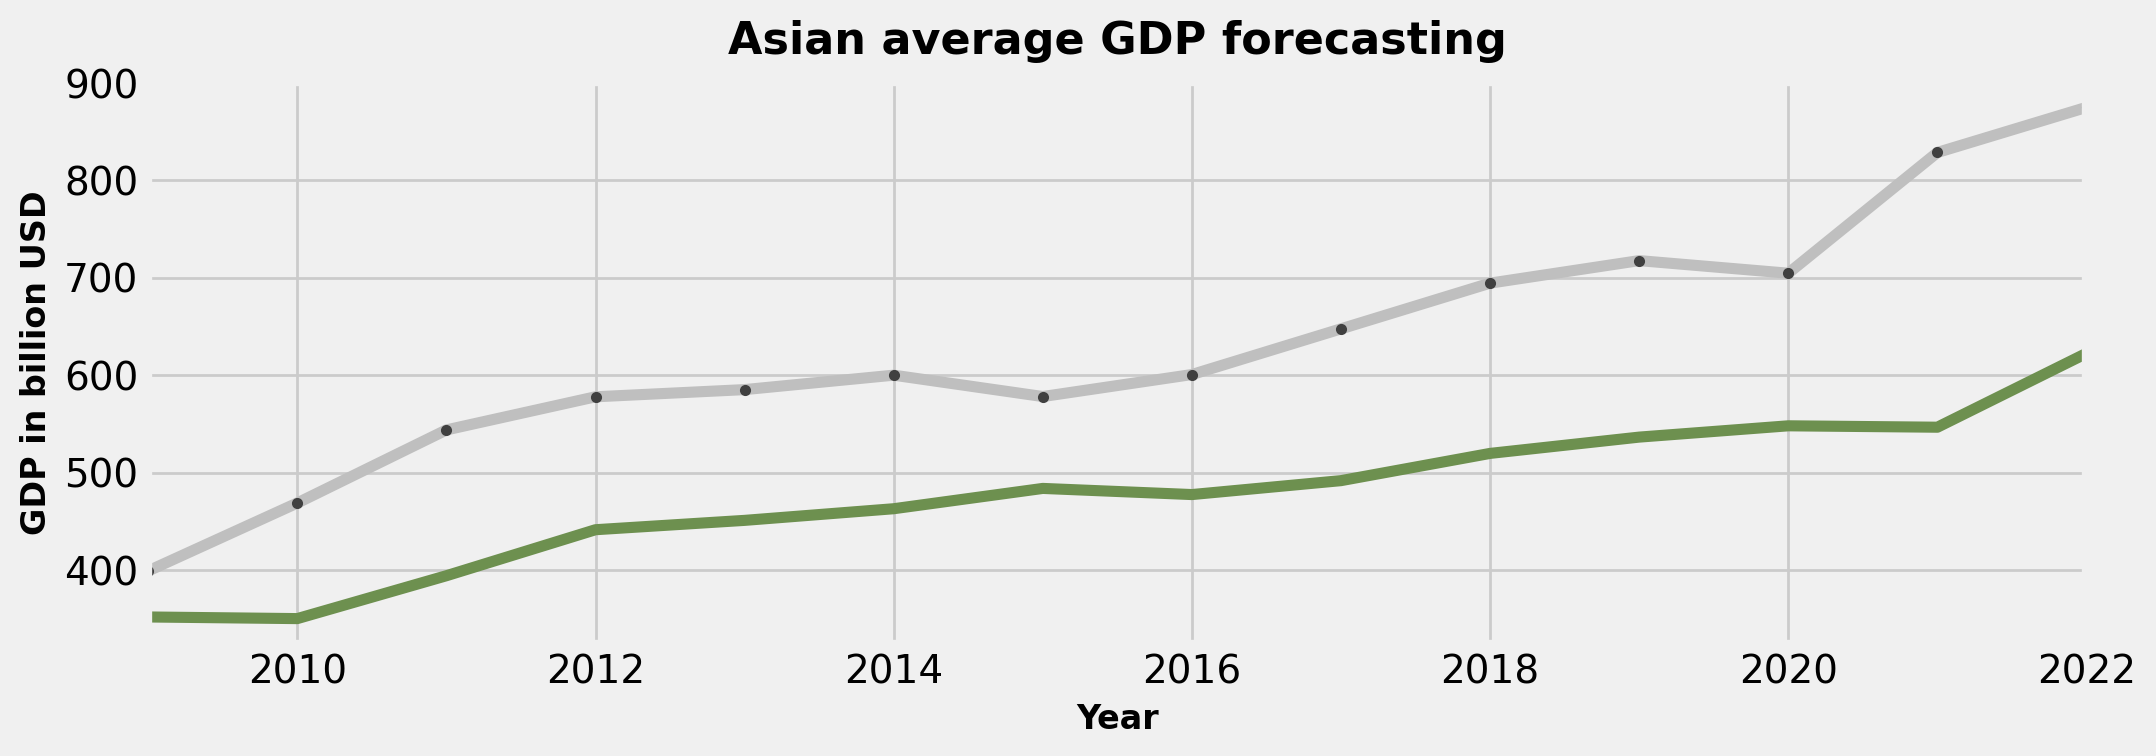

In [7]:
# YOUR CODE HERE (OPTION)
fig, ax = plt.subplots()
# validate the model
ax = y_test.plot(**plot_params)
_ = y_fore.plot(ax=ax, color='C3')
ax.set_title(f'Asian average GDP forecasting')
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel('GDP in billion USD', fontsize=12)
print((f"Validation with mean absolute error: {mae_scores(y_test, y_fore):.2f}"))

In [8]:
# compare testing data and forecasting data
compare_df = pd.DataFrame({
    'y_test': y_test,
    'y_fore': y_fore
})

compare_df['difference'] = compare_df['y_fore'] - compare_df['y_test']
compare_df

,y_test,y_fore,difference
Year,,,
2009-01-01,399.430081,352.181346,-47.248735
2010-01-01,469.106401,350.504878,-118.601523
2011-01-01,544.077520,394.497488,-149.580032
2012-01-01,578.066849,441.697635,-136.369214
2013-01-01,585.439114,451.286249,-134.152866
2014-01-01,600.246237,463.233417,-137.012819
2015-01-01,578.322458,484.067727,-94.254730
2016-01-01,600.907002,477.765397,-123.141606
2017-01-01,647.787315,492.048049,-155.739266


Validation Korea, Rep. with mean absolute error: 169.95
Validation Israel with mean absolute error: 96.67
Validation Vietnam with mean absolute error: 13.06
Validation Mongolia with mean absolute error: 2.28


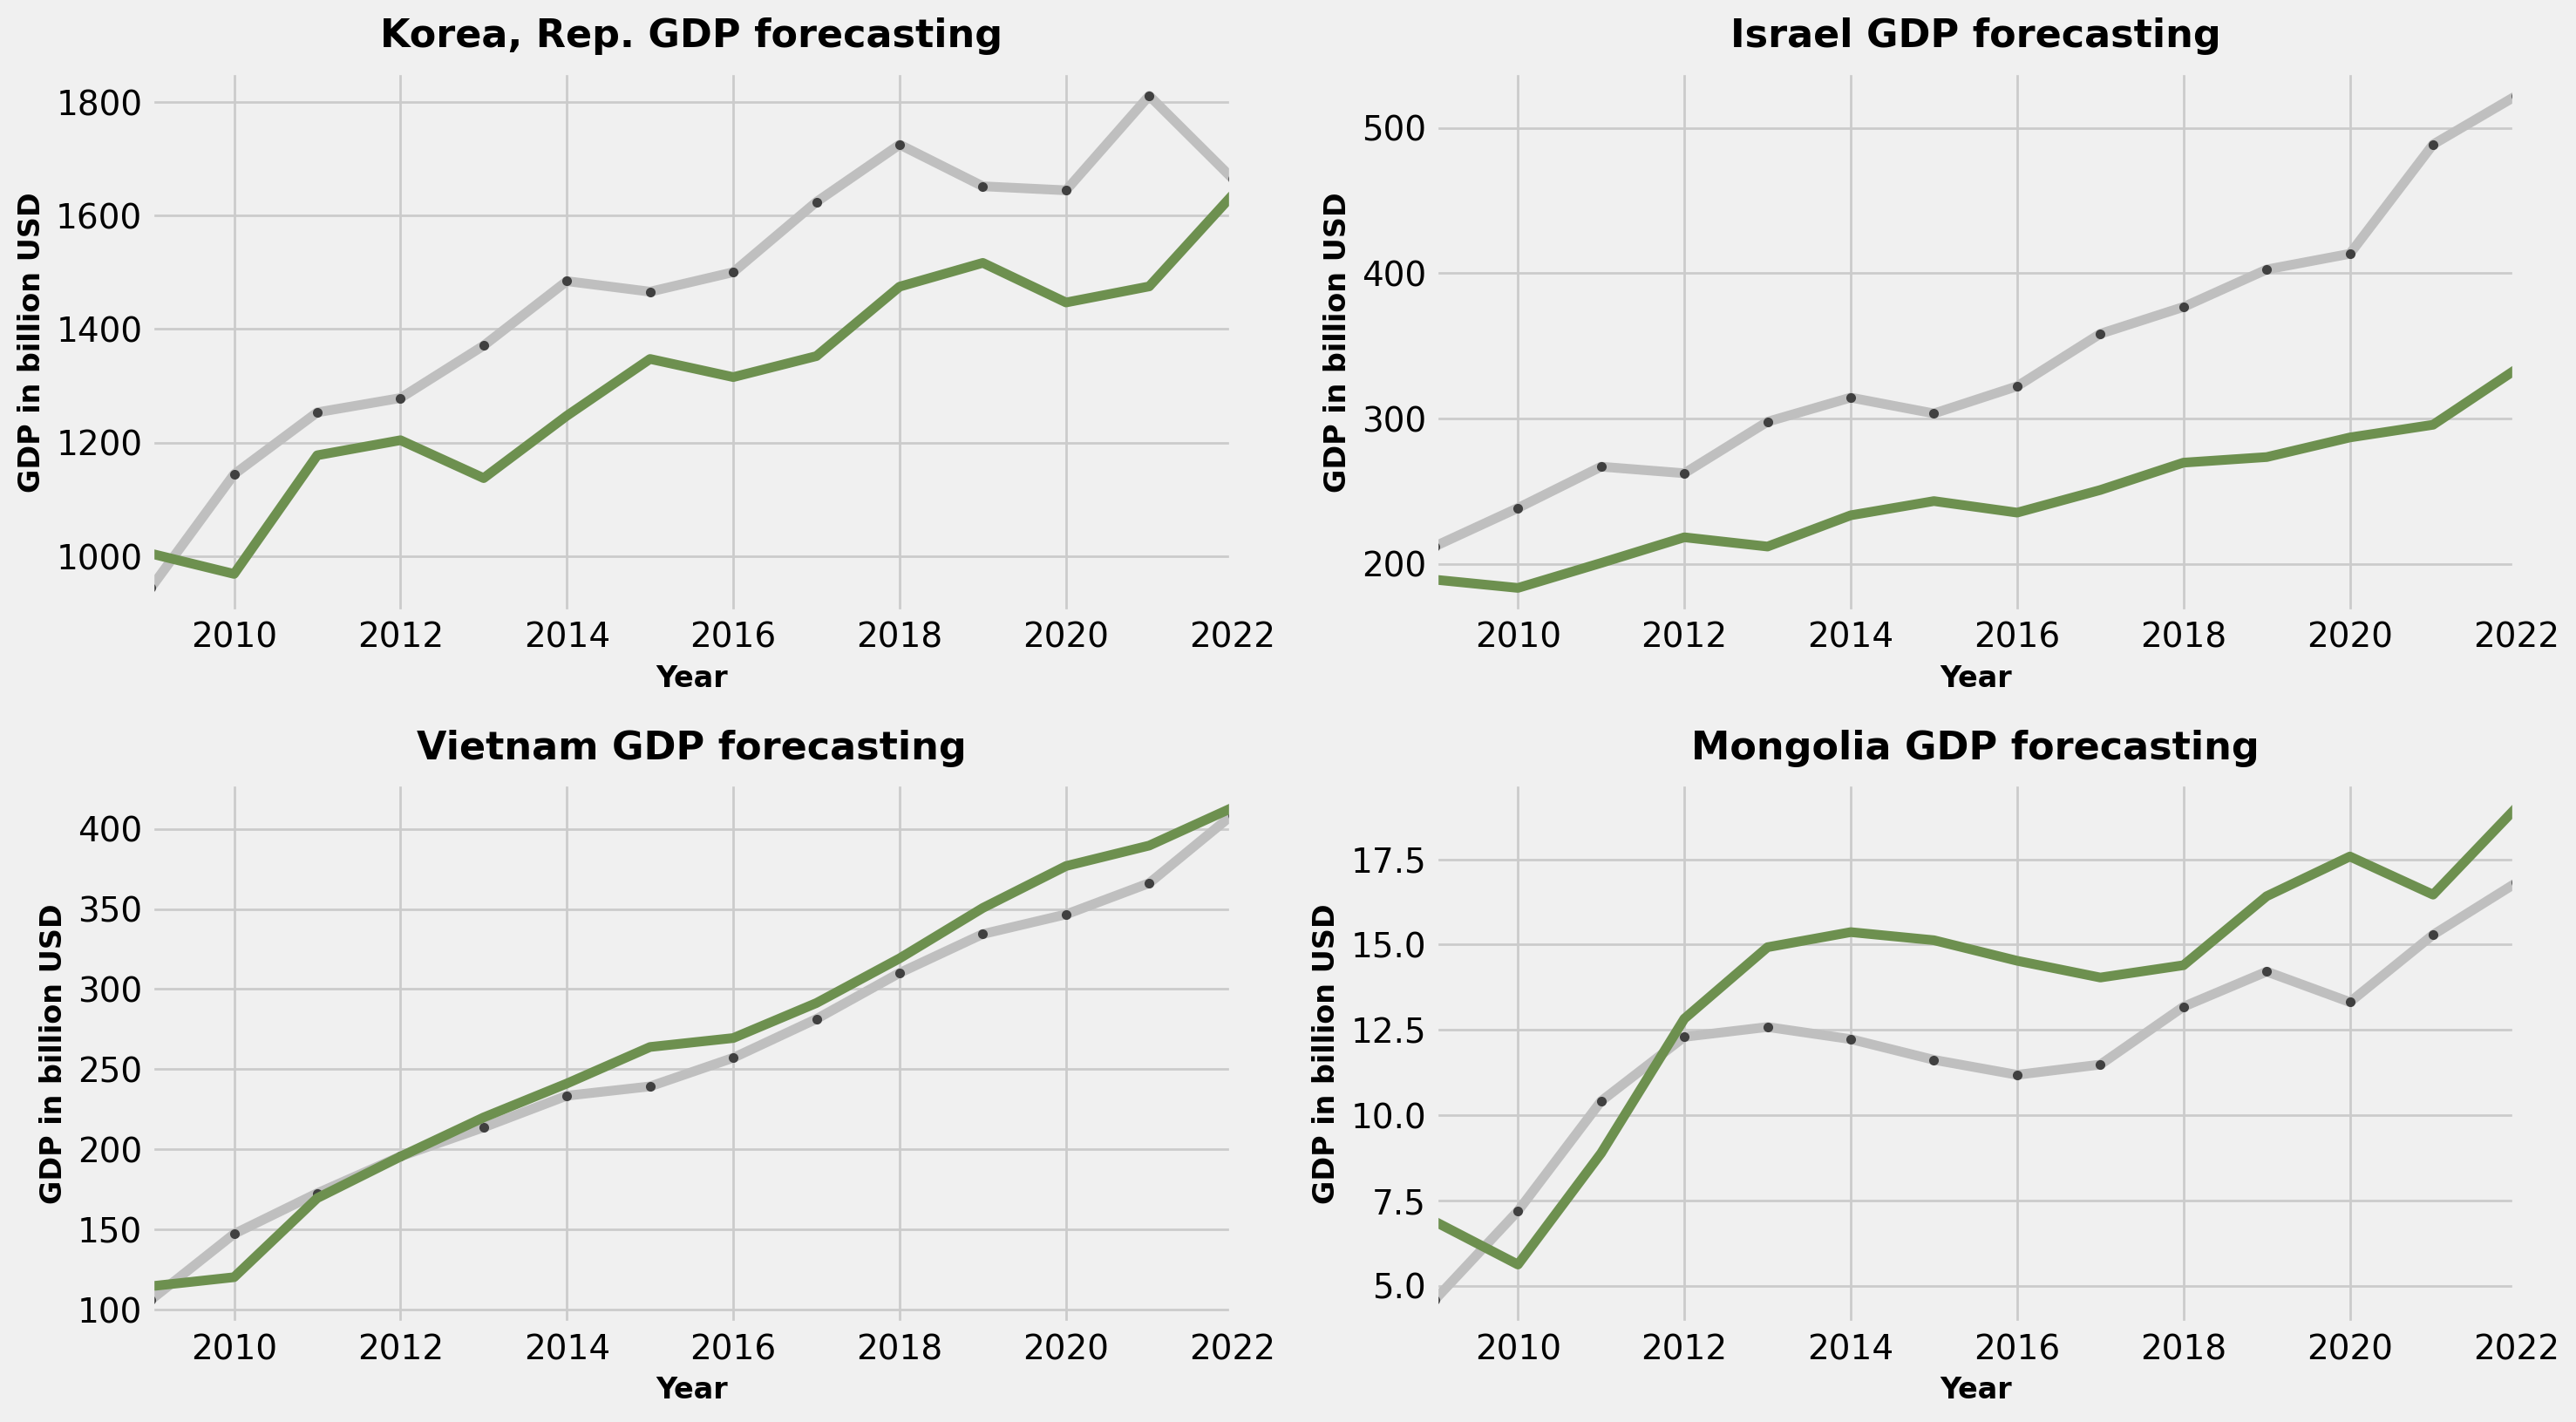

In [9]:
# YOUR CODE HERE (OPTION)
# fig, axs = plt.subplots(2,2)
plt.figure(figsize=(15, 12))
# We can forecast specific countries like this
# Get random sample or pass any asian countries if you want 
countries = random.sample(list(gdp_country_df.columns)[:-1], 4)
for i in range(len(countries)):
    model, X, X_train, y_train, X_test, y_test = training_model(gdp_country_df, countries[i])
    ax = plt.subplot(3, 2, i + 1)
    # predict with training set
    y_pred = pd.Series(model.predict(X_train), index=X_train.index)
    # forecast with testing set
    y_fore = pd.Series(model.predict(X_test), index=X_test.index)
    # validate the model
    print((f"Validation {countries[i]} with mean absolute error: {mae_scores(y_test, y_fore):.2f}"))
    ax = y_test.plot(**plot_params)
    _ = y_fore.plot(ax=ax, color='C3')
    ax.set_title(f'{countries[i]} GDP forecasting')
    ax.set_xlabel("Year", fontsize=12)
    ax.set_ylabel('GDP in billion USD', fontsize=12)

## Conclusion

- The model trained for forecasting the GDP growth in Asia from the preprocessed dataset of GDP growth in every countries in asia from 1995 to 2022.
- As we can see in the trending graph, the model forecasted not quite well because it deviated a gap from the test graph (silver line).
- When evaluate the model with mean absolute error score for all countries, it deviated roughly 100 billion USD in average between the test data and forecast data, which mean model can forecast relatively close to each other.
- Because of small dataset (for GDP forcasting) so it difficult to train the model forecast well, we can improve it using time series cross validation (TimeSeriesSplit) and XGBoost to get higher performance than Linear Regression.